# Milestone 1

Digital Talent Scholarship 2018, Kelas A-BIG DATA - Universitas Gadjah Mada

Anggota:

1. Luthfi Zharif

2. Larasati Aisyah R. A.

3. Karyadi

4. Izzan Rijal

5. Ismul Aksan

Kelompok kami mengeksplorasi aktivitas perusahaan rintisan, atau yang biasa dikenal dengan startup menggunakan dataset berita dari [GDELT](https://www.gdeltproject.org/). Proyek ini akan terus kami perbaiki selama beberapa waktu kedepan.
Laporan ini akan terbagi menjadi beberapa bagian, yaitu pendahuluan, ekstraksi data, transformasi data, dan analisis.

# Pendahuluan

Saat ini, dunia industri sedang memasuki babak baru yaitu revolusi industri keempat yang ditandai dengan perkembangan teknologi yang sangat cepat serta peran teknologi dan informasi yang dominan dalam kehidupan manusia. Perkembangan teknologi berubah pada jangka waktu yang tidak terlalu lama.  Perubahan teknologi ini menyebabkan adanya disrupsi yang saat ini sudah tercermin dengan banyaknya start up atau perusahaan rintisan.  

Startup dapat didefinisikan sebagai perusahaan yang bisnisnya baru yang berkembang pesat dan bertujuan untuk memenuhi kebutuhan pasar dengan mengembangkan atau menawarkan produk, proses, atau layanan yang inovatif secara cepat. Perusahaan rintisan atau start up menerapkan berbagai teknologi seperti internet, e-commerce, komputer, telekomunikasi atau robotik. Pada umumnya, start up berperan dalam membuat dan mengimplementasikan proses inovasi sejak pengembangan, validasi, dan research untuk target pasarnya.

Saat ini, banyak Startup mulai bermunculan di dunia, termasuk di Indonesia. Perusahaan ini berkembang dengan cepat dan memberikan perubahan perilaku masyarakat. Masyarakat yang awalnya menggunakan ojek pangkalan berpindah ke ojek online dengan segala fitur yang ada. Masyarakat yang tadinya berbelanja di mall kini belanja di toko online yang memberikan layanan antar sampai ke rumah.

Salah satu penyebab tumbuh subur startup di Indonesia ialah banyaknya pengguna internet. Dari hasil survei Asosiasi Penyelenggara Jasa Internet Indonesia (APJII), pada tahun 2016 ada 132,7 juta pengguna internet dari total 256,2 juta penduduk Indonesia. Apabila dikelompokkan berdasarkan perangkat yang dipakai ada kelompok yakni mobile phone (63.1 juta pengguna atau 47 %), mobile dan komputer (50.7 juta pengguna atau 51%) serta computer (2,2 juta pengguna atau 2%). Ini merupakan pangsa pasar yang cukup besar, dan memungkinkan perkembangan start up.

Unicorn di dunia startup adalah perusahaan startup yang memiliki nilai pasar lebih dari US$1 miliar. Istilah ini pertama kali digunakan oleh venture capitalist, Aileen Lee, dimana dia memilih kuda bertanduk satu ini untuk mewakili kelangkaan statistik dari usaha-usaha startup. Di Negara lain, seperti Tiongkok, saat ini sudah terdapat 46 perusahaan startup yang masuk dalam kategori Unicorn. Di Indonesia terdapat 4 perusahaan startup yang sudah masuk kategori Unicorn, yakni Bukalapak, Gojek, Tokopedia dan Traveloka. 

Melihat perkembangan startup Indonesia yang cukup dinamis kami tertarik untuk mengetahui bagaimana perkembangan startup Indonesia di mata dunia melalui gdelt. 


# Ekstraksi Data
## Download

Data ini bisa diolah dengan dua cara, yakni melalui olah secara cloud maupun local. Dalam notebook ini, semua pengolahan akan dilakukan secara local. Oleh karena itu, kita perlu mengunduh data GDELT ke dalam mesin lokal terlebih dahulu.

Berikut adalah contoh script untuk mengunduh data GDELT dengan country code 'ID'. Country code ini menandakan bahwa kita hanya menyimpan data yang berhubungan dengan Indonesia. Source code ini disadur dari [Github pak Guntur Budi](https://github.com/gunturbudi/digital-talent/blob/master/RETRIEVE%20GDELT%20DATA.ipynb)

In [ ]:
import requests
import lxml.html as lh

gdelt_base_url = 'http://data.gdeltproject.org/events/'

# get the list of all the links on the gdelt file page
page = requests.get(gdelt_base_url+'index.html')
doc = lh.fromstring(page.content)
link_list = doc.xpath("//*/ul/li/a/@href")

# separate out those links that begin with four digits
file_list = [x for x in link_list if str.isdigit(x[0:4])]
print(file_list)

infilecounter = 0
outfilecounter = 0

import os.path
import urllib
import zipfile
import glob
import operator

local_path = os.getcwd()

fips_country_code = 'ID'

for compressed_file in file_list[infilecounter:]:
    print(compressed_file)

    # if we dont have the compressed file stored locally, go get it. 
    # Keep trying if necessary.
    while not os.path.isfile(local_path + compressed_file):
        print('downloading, '),
        urllib.request.urlretrieve(url=gdelt_base_url + compressed_file,
                           filename=local_path + compressed_file)

    # extract the contents of the compressed file to a temporary directory
    print('extracting,'),
    z = zipfile.ZipFile(file=local_path + compressed_file, mode='r')
    z.extractall(path=local_path + 'tmp/')

    # parse each of the csv files in the working directory,
    print('parsing,'),
    for infile_name in glob.glob(local_path + 'tmp/*'):
        outfile_name = local_path + 'gdelt_id/' + fips_country_code 
        + '%04i.tsv' % outfilecounter

        # open the infile and outfile
        with open(infile_name, mode='r', encoding='utf-8') as infile,
        open(outfile_name, mode='w') as outfile:
            for line in infile:
                # extract lines with our interest country code
                # Try and except to pass trouble data
                try:
                    # We extract only the lines where there is relation 
                    # about Indonesia (ID)
                    if fips_country_code in operator.
                    itemgetter(51, 37, 44)(line.split('\t')):
                        outfile.write(line)
                except:
                    pass
            outfilecounter += 1
        # delete the temporary file
        os.remove(infile_name)
    infilecounter += 1
    print('done')

## Simpan ke MySQL
Perlu dilakukan penyimpanan data ke dalam database MySQL agar data bisa diakses secara local. Adapun langkah yang
dilakukan adalah sebagai berikut

### Bangun koneksi ke MySQL lokal
Silakan buka phpMyAdmin atau program SQL favorit anda (HeidiSQL, Laragon), lalu buat database dengan nama 'gdelt_content_id'

In [1]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

host = 'localhost'
port = '3306'
username = 'root'
password = ''
database = 'gdelt_content_id'

# Create Connection to database
# engine = create_engine('mysql+pymysql://'+username+
# ':'+password+'@'+host+':'+port+'/'+database)

# Note: We use pymysql instead of sqlalchemy because sqlalchemy
# somehow don't allow the text query. Strange bug.
conn = pymysql.connect(
    host=host,
    port=int(port),
    user=username,
    passwd=password,
    db=database,
    charset='utf8mb4')
'''engine = create_engine('mysql+pymysql://root: @localhost:3306
/gdelt_content_id')'''

def run(sql):
    df = pd.read_sql_query(sql, conn)
    return df

### List Data dalam Folder
Di bagian ini, kita akan membaca data GDELT harian (tsv) dalam folder. Data tersebut akan dikompilasi menjadi dataframe Pandas.

In [2]:
from os import listdir
from os.path import isfile, join
folder_id = './gdelt_id/'
files = [f for f in listdir(folder_id) if isfile(join(folder_id, f))]
print(files)

['ID0000.tsv', 'ID0001.tsv', 'ID0002.tsv', 'ID0003.tsv', 'ID0004.tsv', 'ID0005.tsv', 'ID0006.tsv', 'ID0007.tsv', 'ID0008.tsv', 'ID0009.tsv', 'ID0010.tsv', 'ID0011.tsv', 'ID0012.tsv', 'ID0013.tsv', 'ID0014.tsv', 'ID0015.tsv', 'ID0016.tsv', 'ID0017.tsv', 'ID0018.tsv', 'ID0019.tsv', 'ID0020.tsv', 'ID0021.tsv', 'ID0022.tsv', 'ID0023.tsv', 'ID0024.tsv', 'ID0025.tsv', 'ID0026.tsv', 'ID0027.tsv', 'ID0028.tsv', 'ID0029.tsv', 'ID0030.tsv', 'ID0031.tsv', 'ID0032.tsv', 'ID0033.tsv', 'ID0034.tsv', 'ID0035.tsv', 'ID0036.tsv', 'ID0037.tsv', 'ID0038.tsv', 'ID0039.tsv', 'ID0040.tsv', 'ID0041.tsv', 'ID0042.tsv', 'ID0043.tsv', 'ID0044.tsv', 'ID0045.tsv', 'ID0046.tsv', 'ID0047.tsv', 'ID0048.tsv', 'ID0049.tsv', 'ID0050.tsv', 'ID0051.tsv', 'ID0052.tsv', 'ID0053.tsv', 'ID0054.tsv', 'ID0055.tsv', 'ID0056.tsv', 'ID0057.tsv', 'ID0058.tsv', 'ID0059.tsv', 'ID0060.tsv', 'ID0061.tsv', 'ID0062.tsv', 'ID0063.tsv', 'ID0064.tsv', 'ID0065.tsv', 'ID0066.tsv', 'ID0067.tsv', 'ID0068.tsv', 'ID0069.tsv', 'ID0070.tsv', 'ID00

In [5]:
# Open first file for sanity check
df_awal = pd.read_csv(folder_id + files[0],sep="\t")
df_awal.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,798201175,20181029,201810,2018,2018.8192,IDN,INDONESIA,IDN,NaN,NaN,...,NaN,1,Indonesia,ID,ID,-5.0000,120.0000,ID,20181029,https://www.straitstimes.com/singapore/final-g...
1,798201178,20181029,201810,2018,2018.8192,IDN,JAKARTA,IDN,NaN,NaN,...,-797156,4,"Gaza, Israel (general), Israel",IS,IS00,31.4167,34.3333,-797156,20181029,https://www.orlandoecho.com/news/258207362/ind...
2,798201179,20181029,201810,2018,2018.8192,IDN,JAKARTA,IDN,NaN,NaN,...,-2696836,4,"Sidoarjo, Jawa Timur, Indonesia",ID,ID08,-7.4478,112.7180,-2696836,20181029,https://www.orlandoecho.com/news/258207362/ind...
3,798201180,20181029,201810,2018,2018.8192,IDN,JAKARTA,IDN,NaN,NaN,...,-2696836,4,"Gaza, Israel (general), Israel",IS,IS00,31.4167,34.3333,-797156,20181029,https://www.orlandoecho.com/news/258207362/ind...
4,798201182,20181029,201810,2018,2018.8192,IDNHLH,INDONESIA,IDN,NaN,NaN,...,-797156,4,"Sidoarjo, Jawa Timur, Indonesia",ID,ID08,-7.4478,112.7180,-2696836,20181029,https://www.orlandoecho.com/news/258207362/ind...


### Langsung simpan ke MySQL
Untuk menyimpan data ke SQL, kita update data tabelnya untuk setiap file tsv yang ada

In [3]:
engine = create_engine('mysql+pymysql://'+username+':'+password+'@'+host+':'+port+'/'+database)
colnames = list(pd.read_excel('CSV.header.fieldids.xlsx', 
                              sheet_name='CSV.header.dailyupdates'))
Error =0
for berkas in files:
    print('Extracting ' + berkas)
    try:
        df_satuan = pd.DataFrame()
    
        # Important: If your ID0000.tsv contains header, you can delete the header
        df_satuan = pd.read_csv(folder_id + berkas, sep="\t", names= colnames)
        df_satuan.to_sql(name = database, con = engine,if_exists = 'append', index = False)
    except:
        Error= Error+1
        print ('Error',berkas)
print ('Total Error :',Error)
  

Extracting ID0000.tsv
Extracting ID0001.tsv
Extracting ID0002.tsv
Extracting ID0003.tsv
Extracting ID0004.tsv
Extracting ID0005.tsv
Extracting ID0006.tsv
Extracting ID0007.tsv
Extracting ID0008.tsv
Extracting ID0009.tsv
Extracting ID0010.tsv
Extracting ID0011.tsv
Extracting ID0012.tsv
Extracting ID0013.tsv
Extracting ID0014.tsv
Extracting ID0015.tsv
Extracting ID0016.tsv
Extracting ID0017.tsv
Extracting ID0018.tsv
Extracting ID0019.tsv
Extracting ID0020.tsv
Extracting ID0021.tsv
Extracting ID0022.tsv
Extracting ID0023.tsv
Extracting ID0024.tsv
Extracting ID0025.tsv
Extracting ID0026.tsv
Extracting ID0027.tsv
Extracting ID0028.tsv
Extracting ID0029.tsv
Extracting ID0030.tsv
Extracting ID0031.tsv
Extracting ID0032.tsv
Extracting ID0033.tsv
Extracting ID0034.tsv
Extracting ID0035.tsv
Extracting ID0036.tsv
Extracting ID0037.tsv
Extracting ID0038.tsv
Extracting ID0039.tsv
Extracting ID0040.tsv
Extracting ID0041.tsv
Extracting ID0042.tsv
Extracting ID0043.tsv
Extracting ID0044.tsv
Extracting

Extracting ID0366.tsv
Extracting ID0367.tsv
Extracting ID0368.tsv
Extracting ID0369.tsv
Extracting ID0370.tsv
Extracting ID0371.tsv
Extracting ID0372.tsv
Extracting ID0373.tsv
Extracting ID0374.tsv
Extracting ID0375.tsv
Extracting ID0376.tsv
Extracting ID0377.tsv
Extracting ID0378.tsv
Extracting ID0379.tsv
Extracting ID0380.tsv
Extracting ID0381.tsv
Extracting ID0382.tsv
Extracting ID0383.tsv
Extracting ID0384.tsv
Extracting ID0385.tsv
Extracting ID0386.tsv
Extracting ID0387.tsv
Extracting ID0388.tsv
Extracting ID0389.tsv
Extracting ID0390.tsv
Extracting ID0391.tsv
Extracting ID0392.tsv
Extracting ID0393.tsv
Extracting ID0394.tsv
Extracting ID0395.tsv
Extracting ID0396.tsv
Extracting ID0397.tsv
Extracting ID0398.tsv
Extracting ID0399.tsv
Extracting ID0400.tsv
Extracting ID0401.tsv
Extracting ID0402.tsv
Extracting ID0403.tsv
Extracting ID0404.tsv
Extracting ID0405.tsv
Extracting ID0406.tsv
Extracting ID0407.tsv
Extracting ID0408.tsv
Extracting ID0409.tsv
Extracting ID0410.tsv
Extracting

Extracting ID0724.tsv
Extracting ID0725.tsv
Extracting ID0726.tsv
Extracting ID0727.tsv
Extracting ID0728.tsv
Extracting ID0729.tsv
Extracting ID0730.tsv
Extracting ID0731.tsv
Extracting ID0732.tsv
Extracting ID0733.tsv
Extracting ID0734.tsv
Extracting ID0735.tsv
Extracting ID0736.tsv
Extracting ID0737.tsv
Extracting ID0738.tsv
Extracting ID0739.tsv
Extracting ID0740.tsv
Extracting ID0741.tsv
Extracting ID0742.tsv
Extracting ID0743.tsv
Extracting ID0744.tsv
Extracting ID0745.tsv
Extracting ID0746.tsv
Extracting ID0747.tsv
Extracting ID0748.tsv
Extracting ID0749.tsv
Extracting ID0750.tsv
Extracting ID0751.tsv
Extracting ID0752.tsv
Extracting ID0753.tsv
Error ID0753.tsv
Extracting ID0754.tsv
Extracting ID0755.tsv
Extracting ID0756.tsv
Extracting ID0757.tsv
Extracting ID0758.tsv
Extracting ID0759.tsv
Error ID0759.tsv
Extracting ID0760.tsv
Extracting ID0761.tsv
Extracting ID0762.tsv
Extracting ID0763.tsv
Extracting ID0764.tsv
Extracting ID0765.tsv
Extracting ID0766.tsv
Extracting ID0767.ts

Extracting ID1082.tsv
Extracting ID1083.tsv
Extracting ID1084.tsv
Extracting ID1085.tsv
Extracting ID1086.tsv
Error ID1086.tsv
Extracting ID1087.tsv
Error ID1087.tsv
Extracting ID1088.tsv
Extracting ID1089.tsv
Extracting ID1090.tsv
Extracting ID1091.tsv
Extracting ID1092.tsv
Extracting ID1093.tsv
Extracting ID1094.tsv
Extracting ID1095.tsv
Extracting ID1096.tsv
Error ID1096.tsv
Extracting ID1097.tsv
Extracting ID1098.tsv
Extracting ID1099.tsv
Extracting ID1100.tsv
Extracting ID1101.tsv
Extracting ID1102.tsv
Error ID1102.tsv
Extracting ID1103.tsv
Extracting ID1104.tsv
Extracting ID1105.tsv
Extracting ID1106.tsv
Extracting ID1107.tsv
Extracting ID1108.tsv
Extracting ID1109.tsv
Extracting ID1110.tsv
Extracting ID1111.tsv
Extracting ID1112.tsv
Extracting ID1113.tsv
Extracting ID1114.tsv
Extracting ID1115.tsv
Extracting ID1116.tsv
Extracting ID1117.tsv
Extracting ID1118.tsv
Extracting ID1119.tsv
Extracting ID1120.tsv
Extracting ID1121.tsv
Extracting ID1122.tsv
Extracting ID1123.tsv
Extracti

Extracting ID1420.tsv
Extracting ID1421.tsv
Extracting ID1422.tsv
Extracting ID1423.tsv
Error ID1423.tsv
Extracting ID1424.tsv
Extracting ID1425.tsv
Extracting ID1426.tsv
Extracting ID1427.tsv
Extracting ID1428.tsv
Extracting ID1429.tsv
Extracting ID1430.tsv
Extracting ID1431.tsv
Extracting ID1432.tsv
Extracting ID1433.tsv
Error ID1433.tsv
Extracting ID1434.tsv
Extracting ID1435.tsv
Extracting ID1436.tsv
Extracting ID1437.tsv
Extracting ID1438.tsv
Extracting ID1439.tsv
Error ID1439.tsv
Extracting ID1440.tsv
Error ID1440.tsv
Extracting ID1441.tsv
Extracting ID1442.tsv
Extracting ID1443.tsv
Extracting ID1444.tsv
Extracting ID1445.tsv
Extracting ID1446.tsv
Extracting ID1447.tsv
Extracting ID1448.tsv
Extracting ID1449.tsv
Extracting ID1450.tsv
Extracting ID1451.tsv
Extracting ID1452.tsv
Extracting ID1453.tsv
Extracting ID1454.tsv
Extracting ID1455.tsv
Extracting ID1456.tsv
Extracting ID1457.tsv
Extracting ID1458.tsv
Extracting ID1459.tsv
Extracting ID1460.tsv
Extracting ID1461.tsv
Extracti

Extracting ID1781.tsv
Extracting ID1782.tsv
Extracting ID1783.tsv
Extracting ID1784.tsv
Extracting ID1785.tsv
Error ID1785.tsv
Extracting ID1786.tsv
Extracting ID1787.tsv
Extracting ID1788.tsv
Extracting ID1789.tsv
Extracting ID1790.tsv
Extracting ID1791.tsv
Extracting ID1792.tsv
Extracting ID1793.tsv
Extracting ID1794.tsv
Extracting ID1795.tsv
Extracting ID1796.tsv
Extracting ID1797.tsv
Extracting ID1798.tsv
Error ID1798.tsv
Extracting ID1799.tsv
Extracting ID1800.tsv
Extracting ID1801.tsv
Extracting ID1802.tsv
Extracting ID1803.tsv
Error ID1803.tsv
Extracting ID1804.tsv
Extracting ID1805.tsv
Extracting ID1806.tsv
Extracting ID1807.tsv
Extracting ID1808.tsv
Extracting ID1809.tsv
Extracting ID1810.tsv
Extracting ID1811.tsv
Extracting ID1812.tsv
Extracting ID1813.tsv
Extracting ID1814.tsv
Extracting ID1815.tsv
Extracting ID1816.tsv
Extracting ID1817.tsv
Extracting ID1818.tsv
Extracting ID1819.tsv
Extracting ID1820.tsv
Extracting ID1821.tsv
Extracting ID1822.tsv
Extracting ID1823.tsv
Ext

D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Error ID2034.tsv
Extracting ID2035.tsv
Error ID2035.tsv
Extracting ID2036.tsv


D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Error ID2036.tsv
Extracting ID2037.tsv
Extracting ID2038.tsv
Error ID2038.tsv
Extracting ID2039.tsv
Error ID2039.tsv
Extracting ID2040.tsv
Error ID2040.tsv
Extracting ID2041.tsv
Error ID2041.tsv
Extracting ID2042.tsv
Error ID2042.tsv
Extracting ID2043.tsv
Error ID2043.tsv
Extracting ID2044.tsv
Error ID2044.tsv
Extracting ID2045.tsv
Extracting ID2046.tsv
Error ID2046.tsv
Extracting ID2047.tsv


D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Extracting ID2048.tsv
Error ID2048.tsv
Extracting ID2049.tsv
Error ID2049.tsv
Extracting ID2050.tsv
Error ID2050.tsv
Extracting ID2051.tsv
Error ID2051.tsv
Extracting ID2052.tsv
Error ID2052.tsv
Extracting ID2053.tsv
Extracting ID2054.tsv
Error ID2054.tsv
Extracting ID2055.tsv


D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Error ID2055.tsv
Extracting ID2056.tsv
Error ID2056.tsv
Extracting ID2057.tsv
Error ID2057.tsv
Extracting ID2058.tsv
Error ID2058.tsv
Extracting ID2059.tsv


D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,14,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Error ID2059.tsv
Extracting ID2060.tsv
Error ID2060.tsv
Extracting ID2061.tsv


D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Error ID2061.tsv
Extracting ID2062.tsv
Error ID2062.tsv
Extracting ID2063.tsv
Error ID2063.tsv
Extracting ID2064.tsv
Extracting ID2065.tsv
Error ID2065.tsv
Extracting ID2066.tsv
Extracting ID2067.tsv
Error ID2067.tsv
Extracting ID2068.tsv
Extracting ID2069.tsv
Error ID2069.tsv
Extracting ID2070.tsv
Extracting ID2071.tsv
Error ID2071.tsv
Extracting ID2072.tsv
Error ID2072.tsv
Extracting ID2073.tsv
Error ID2073.tsv
Extracting ID2074.tsv
Error ID2074.tsv
Extracting ID2075.tsv
Error ID2075.tsv
Extracting ID2076.tsv
Error ID2076.tsv
Extracting ID2077.tsv


D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Error ID2077.tsv
Extracting ID2078.tsv
Extracting ID2079.tsv
Extracting ID2080.tsv
Extracting ID2081.tsv
Error ID2081.tsv
Extracting ID2082.tsv
Extracting ID2083.tsv
Error ID2083.tsv
Extracting ID2084.tsv


D:\Program File\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Error ID2084.tsv
Extracting ID2085.tsv
Error ID2085.tsv
Extracting ID2086.tsv
Extracting ID2087.tsv
Extracting ID2088.tsv
Extracting ID2089.tsv
Extracting ID2090.tsv
Extracting ID2091.tsv
Error ID2091.tsv
Extracting ID2092.tsv
Extracting ID2093.tsv
Extracting ID2094.tsv
Extracting ID2095.tsv
Extracting ID2096.tsv
Error ID2096.tsv
Extracting ID2097.tsv
Extracting ID2098.tsv
Extracting ID2099.tsv
Extracting ID2100.tsv
Extracting ID2101.tsv
Extracting ID2102.tsv
Extracting ID2103.tsv
Extracting ID2104.tsv
Error ID2104.tsv
Extracting ID2105.tsv
Extracting ID2106.tsv
Extracting ID2107.tsv
Extracting ID2108.tsv
Extracting ID2109.tsv
Error ID2109.tsv
Extracting ID2110.tsv
Extracting ID2111.tsv
Extracting ID2112.tsv
Extracting ID2113.tsv
Error ID2113.tsv
Extracting ID2114.tsv
Error ID2114.tsv
Extracting ID2115.tsv
Extracting ID2116.tsv
Error ID2116.tsv
Extracting ID2117.tsv
Extracting ID2118.tsv
Extracting ID2119.tsv
Extracting ID2120.tsv
Error ID2120.tsv
Extracting ID2121.tsv
Error ID2121.tsv

# Transformasi Data

## Cek Data Awal
Setelah data tersimpan secara sukses di MySQL, kita melakukan eksplorasi sederhana. Langkah pertama yang perlu dilakukan adalah melakukan filter artikel yang sesuai dengan topik startup. Dengan asumsi judul berita dimuat dalam URL artikel, maka dilakukan  filter kolom 'SOURCEURL' dengan menggunakan kata kunci yang berhubungan dengan topik startup. Sejauh ini ada beberapa kata kunci adalah sebagai berikut:

- Startup

- Start-up

- Unicorn

- Silicon-valley

- Ecommerce

- E-commerce

- Rintisan

- Perusahaan-rintisan

- Perusahaan-startup

- Bisnis-startup

- Startup-business

- Startup-digital

- Digital-startup

- Crowdfunding

- Fintech

- Marketplace

- Digital-platform

- Platform-digital


In [30]:
data_accident = run("""
SELECT 
SQLDATE,Year,Actor1Code,ActionGeo_FullName, Actor1Name,SOURCEURL 
FROM gdelt_content_id
    
WHERE
    ActionGeo_FullName LIKE '%INDONESIA' AND
    Actor1Code LIKE '%IDN%' AND
    Actor1Name LIKE '%INDONESIA%' AND
    (Year >=2013 AND Year <=2018) AND
    (sourceurl LIKE '%crashed%' OR
    sourceurl LIKE '%car-crash%' OR
    sourceurl LIKE '%plane-crash%' OR
    sourceurl LIKE '%ship-crash%'OR
    sourceurl LIKE '%toba-crash%' OR
    sourceurl LIKE '%bus-crash%' OR
    sourceurl LIKE '%motorcycle-crash%' OR
    sourceurl LIKE '%train-crash%')
""")

data_accident

,SQLDATE,Year,Actor1Code,ActionGeo_FullName,Actor1Name,SOURCEURL
0,20181029,2018,IDN,"Pangkal Pinang, Indonesia (general), Indonesia",INDONESIA,https://www.stuff.co.nz/travel/travel-troubles...
1,20181029,2018,IDN,"Pangkal, Jawa Timur, Indonesia",INDONESIA,https://www.marketwatch.com/story/indonesian-p...
2,20181029,2018,IDN,"Sumatra, Indonesia (general), Indonesia",INDONESIA,https://timesofindia.indiatimes.com/world/rest...
3,20181029,2018,IDN,"Pangkal Pinang, Indonesia (general), Indonesia",INDONESIA,https://www.indonesia-investments.com/news/tod...
4,20181029,2018,IDN,"Jakarta, Jakarta Raya, Indonesia",INDONESIAN,https://www.cnn.com/2018/10/28/asia/lion-air-p...
5,20181029,2018,IDN,"Tanjung Priok, Sumatera Utara, Indonesia",INDONESIA,https://www.nation.co.ke/news/world/Indonesian...
6,20181029,2018,IDNGOV,"Tanjung Priok, Sumatera Utara, Indonesia",INDONESIA,https://www.nation.co.ke/news/world/Indonesian...
7,20181029,2018,IDN,"Jakarta, Jakarta Raya, Indonesia",INDONESIA,https://www.seattlepi.com/business/article/Lio...
8,20181029,2018,IDN,"Surabaya, Jawa Timur, Indonesia",INDONESIA,https://www.seattlepi.com/business/article/Lio...
9,20181029,2018,IDN,"Juanda, Jawa Timur, Indonesia",INDONESIAN,https://www.kimberleybulletin.com/news/lion-ai...


In [31]:
print(data_accident.shape)
data_accident.head()

(1639, 6)


,SQLDATE,Year,Actor1Code,ActionGeo_FullName,Actor1Name,SOURCEURL
0,20181029,2018,IDN,"Pangkal Pinang, Indonesia (general), Indonesia",INDONESIA,https://www.stuff.co.nz/travel/travel-troubles...
1,20181029,2018,IDN,"Pangkal, Jawa Timur, Indonesia",INDONESIA,https://www.marketwatch.com/story/indonesian-p...
2,20181029,2018,IDN,"Sumatra, Indonesia (general), Indonesia",INDONESIA,https://timesofindia.indiatimes.com/world/rest...
3,20181029,2018,IDN,"Pangkal Pinang, Indonesia (general), Indonesia",INDONESIA,https://www.indonesia-investments.com/news/tod...
4,20181029,2018,IDN,"Jakarta, Jakarta Raya, Indonesia",INDONESIAN,https://www.cnn.com/2018/10/28/asia/lion-air-p...


Berdasarkan hasil di atas, terdapat beberapa data duplikat, yang dapat dilihat dari kolom 'SOURCEURL'. Data duplikat ini 
diduga memiliki informasi yang berbeda pada kolom-kolom lainnya, seperti Actor1Name, Actor2Name, dll.

Untuk saat ini, kita memfokuskan hasil dengan menghapus data duplikat.

In [32]:
data_accident = data_accident.copy()

# Remove duplicate data, keep the first occurences
data_accident = data_accident.drop_duplicates('SOURCEURL')
data_accident.shape

(830, 6)

Dengan menghapus data duplikat diperoleh 2217 baris berita yang unik, jumlah tersebut hampir 1/3 bagian dari data sebelumnya. Selanjutnya, data tersebut disimpan ke dalam MySQL. Namun, data sebelumnya tetap disimpan untuk analisis selanjutnya.

In [33]:
# Save non-duplicated data to 'startup_indonesia' table
host = 'localhost'
port = '3306'
username = 'root'
password = ''
database = 'gdelt_content_id'
database_name = 'data_accident'
engine_s = create_engine('mysql+pymysql://'+username+':'+password+'@'+host+':'
                         +port+'/'+database)
data_accident.to_sql(database_name, engine_s)

# Save duplicated data to 'startup_indonesia_dup' table
database = 'gdelt_content_id'
database_name_dup = 'data_accident_dup'
data_accident.to_sql(database_name_dup, engine_s)

# Analisis Data
Dengan data yang sudah unik tersebut, kita memulai analisis berita sesuai dengan kebutuhan. 

## Analisis sumber berita
Di bagian ini, akan ditampilkan website yang menjadi sumber berita.

In [34]:
import urllib

data_sourceurl = data_accident['SOURCEURL']
list_link = []

# for extracting domain url. Example: 
# http://fintechnews.sg/25313/blockchain/blockchain-indonesia/ --> fintechnews.sg
for link in data_sourceurl:
    list_link.append(urllib.parse.urlparse(link).netloc)
    
data_link = pd.Series(list_link)

# Count by its occurences
data_link_count = data_link.value_counts()
data_link_count

www.thejakartapost.com             24
www.antaranews.com                 15
sentinelrepublic.com               15
www.belljarnews.com                14
www.thestar.com.my                 14
www.dailymail.co.uk                11
www.news.com.au                    10
www.newsfultoncounty.com           10
en.tempo.co                         9
thrasherbacker.com                  9
news.asiaone.com                    8
news.yahoo.com                      8
zeenews.india.com                   7
article.wn.com                      7
www.straitstimes.com                7
www.stuff.co.nz                     6
www.therakyatpost.com               6
au.news.yahoo.com                   6
www.ifreepress.com                  6
www.newser.com                      5
www.channelnewsasia.com             5
www.tnp.sg                          5
www.straitstimes.com:80             5
www.express.co.uk                   5
www.indonesiatribune.com            5
www.freemalaysiatoday.com           5
www.business

Dari data di atas, diketahui pemberitaan startup di Indonesia banyak dilakukan oleh techinasia.com, dealstreetasia.com, dan thejakartapost.com.

## Analisis Tren Startup Berdasarkan Waktu
Dalam bagian ini, akan ditampilkan banyaknya berita startup dalam hitungan bulan. Analisis ini berguna untuk melihat kapan pemberitaan banyak bermunculan, serta melihat apakah ada peningkatan atau penurunan pemberitaan startup di Indonesia.

In [7]:
data_count = data_accident.copy()
# data_count['MonthYear'] = pd.to_datetime(data_count['MonthYear']
# .astype(str), format='%Y%m')

# Aggregate the table with count
data_count = data_count.groupby(data_count['SQLDATE']).agg({'count'})
data_count = data_count.sort_index(ascending=True)
data_count['index'].head()

KeyError: 'index'

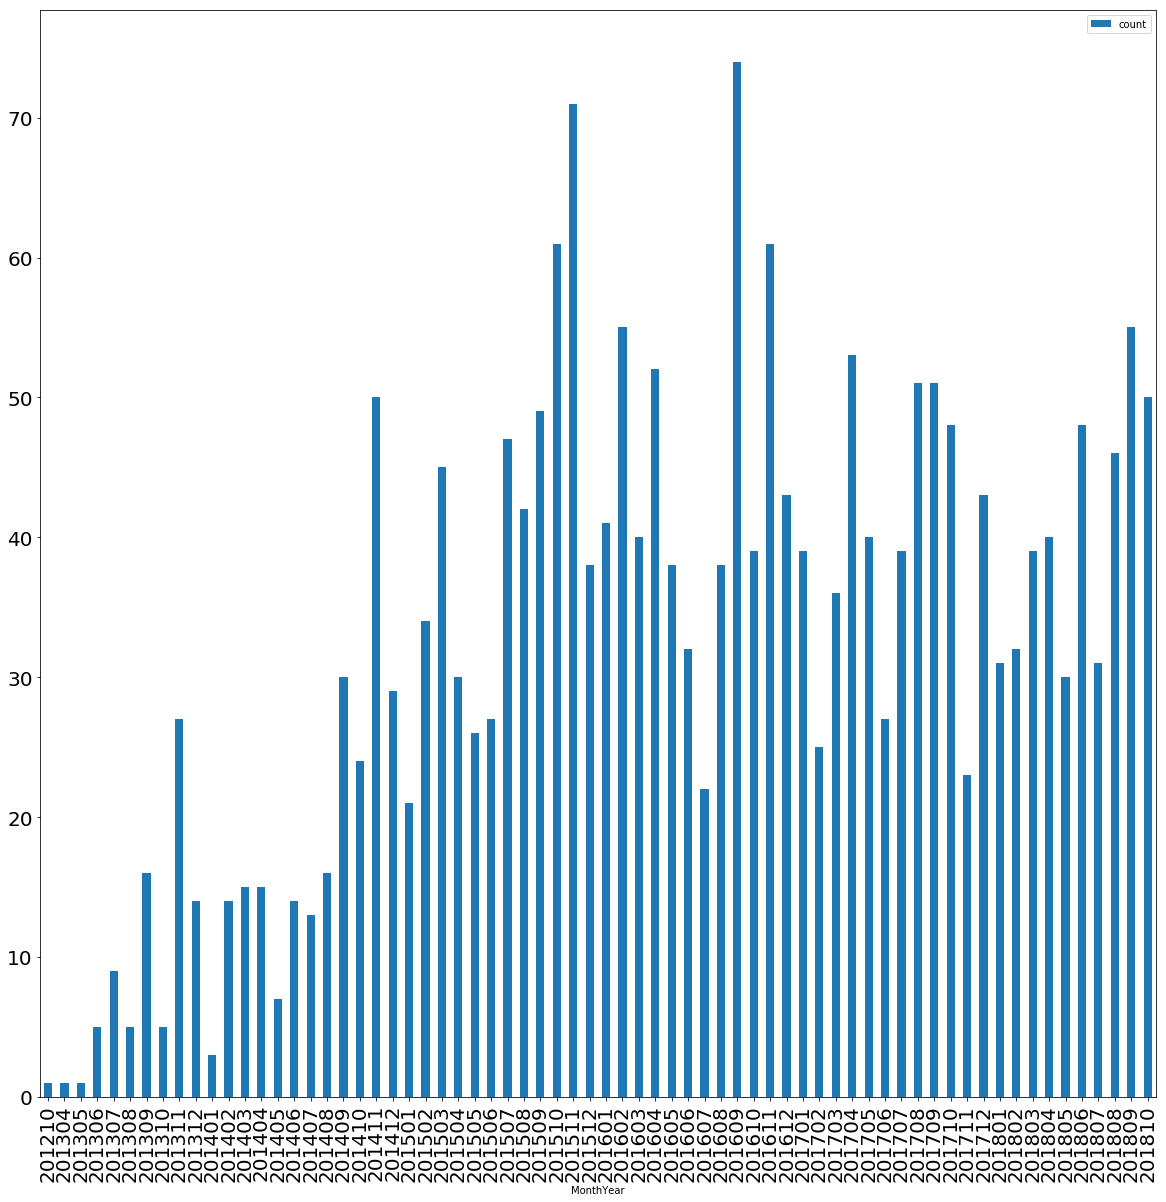

In [9]:
# display it using bar
data_count['GLOBALEVENTID'].plot(kind='bar', figsize=(20,20), fontsize=20)

Berdasarkan grafik diatas, terlihat bahwa pemberitaan startup di Indonesia masih mengalami fluktuasi pada 5 tahun terakhir. Tren kenaikan terlihat pada periode 2012-2014. Berita startup di Indonesia mulai sering bermunculan sejak November 2014.

# Rencana Selanjutnya

1. Ekstraksi teks berita

2. Analisis aktor

3. Analisis word cloud

4. Analisis sentimen
